In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [2]:
class cnn:
    def __init__(self):
        self.batch_size = 128
        self.dir_data='data/'
        self.num_of_classes,self.dict =create_dic(self.dir_data)
        self.image_size = 28
        self.validate_data = 10000

In [3]:
with open('mini_classes.txt','w') as f:
    for file in sorted(os.listdir('data/')):
        if file.endswith(".npy"):
            print(file.split(".")[0], file = f)
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()
classes = [c.replace('\n','').replace(' ','_') for c in classes]

In [4]:
classes

['ambulance',
 'apple',
 'axe',
 'basketball',
 'bicycle',
 'bird',
 'butterfly',
 'car',
 'carrot',
 'cat',
 'chair',
 'clock',
 'cookie',
 'cup',
 'donut',
 'envelope',
 'flower',
 'key',
 'knife',
 'lightning',
 'pencil',
 'pizza',
 'rainbow',
 'snake',
 'spider',
 'star',
 'tractor',
 'tree',
 'whale',
 'windmill']

In [5]:
def create_dic(dir_data):
    dict={}
    i=0
    for file in sorted(os.listdir(dir_data)):
        if file.endswith(".npy"):
            str=file.split(".")
            dict[i]=str[0]
            i=i+1
    return i,dict

In [6]:
def load_data(cnn):
    dir_data='data/'
    num_of_classess,dict=create_dic(dir_data)
    data_l=np.zeros((1))
    data_d=np.zeros((1,cnn.image_size*cnn.image_size))
    index=0
    class_names = []
    for file in sorted(os.listdir(dir_data)):
        if file.endswith(".npy"):
            print(data_l.shape,data_d.shape,"cur label num!",index,file)
            curr_data=np.load(dir_data+file)

            #change to white background
            curr_data=255-curr_data;
            data_d=np.concatenate((data_d,curr_data))
            data_l=np.concatenate((data_l,np.ones(curr_data.shape[0])*index))
            index=index+1
            class_names.append(file.split('.')[0])




    data_l=np.expand_dims(data_l,1)
    data_all=np.concatenate((data_d,data_l),axis=1)
    data_all=np.random.permutation(data_all)

    x_data=data_all[:,0:-1]
    y_data=data_all[:,-1]
    num_img=x_data.shape[0]
    data_img=np.reshape(x_data,[num_img,cnn.image_size,cnn.image_size])


    data_train=data_img[cnn.validate_data:,:,:]
    data_train=np.expand_dims(data_train,3)

    labels_train=y_data[cnn.validate_data:]
    data_test=data_img[:cnn.validate_data:,:,:]
    data_test=np.expand_dims(data_test,3)

    labels_test=y_data[:cnn.validate_data]


    return data_train,labels_train,data_test,labels_test,class_names

In [ ]:
quick_draw_cnn=cnn()
x_train, y_train, x_test, y_test, class_names = load_data(quick_draw_cnn)
num_classes = len(class_names)

(1,) (1, 784) cur label num! 0 ambulance.npy
(148005,) (148005, 784) cur label num! 1 apple.npy
(292727,) (292727, 784) cur label num! 2 axe.npy
(416849,) (416849, 784) cur label num! 3 basketball.npy
(550642,) (550642, 784) cur label num! 4 bicycle.npy
(677169,) (677169, 784) cur label num! 5 bird.npy
(810741,) (810741, 784) cur label num! 6 butterfly.npy
(928740,) (928740, 784) cur label num! 7 car.npy
(1111504,) (1111504, 784) cur label num! 8 carrot.npy
(1243963,) (1243963, 784) cur label num! 9 cat.npy
(1367165,) (1367165, 784) cur label num! 10 chair.npy
(1589871,) (1589871, 784) cur label num! 11 clock.npy
(1710407,) (1710407, 784) cur label num! 12 cookie.npy
(1841760,) (1841760, 784) cur label num! 13 cup.npy
(1972481,) (1972481, 784) cur label num! 14 donut.npy
(2113232,) (2113232, 784) cur label num! 15 envelope.npy
(2248095,) (2248095, 784) cur label num! 16 flower.npy
(2392913,) (2392913, 784) cur label num! 17 key.npy
(2553878,) (2553878, 784) cur label num! 18 knife.npy


cat


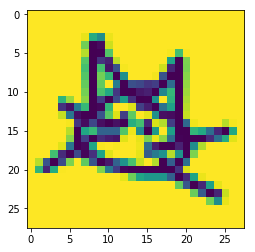

In [8]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [9]:
x_train = x_train.reshape(x_train.shape[0], quick_draw_cnn.image_size, quick_draw_cnn.image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], quick_draw_cnn.image_size, quick_draw_cnn.image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(filters=32, kernel_size=[5,5], padding='same',input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Convolution2D(filters=32, kernel_size=[5,5],padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=500, activation='relu'))
model.add(layers.Dense(units=num_classes, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          25632     
__________

In [11]:
model.fit(x = x_train, y = y_train, validation_data=(x_test, y_test), batch_size=quick_draw_cnn.batch_size, epochs=1)
acc = model.evaluate(x_test, y_test,batch_size=quick_draw_cnn.batch_size)
print('Test accuracy:', acc[1])

Train on 231202 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s 182us/step
Test accuracy: 1.0


['butterfly', 'cat']


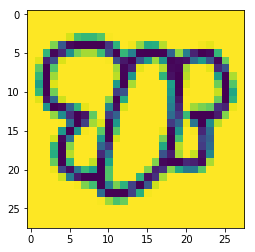

In [12]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:]
latex = [class_names[x] for x in ind]
print(latex)

In [13]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [14]:
model.save('keras.h5')

In [15]:
!pip install tensorflowjs 

In [15]:
!tensorflowjs_converter --input_format keras keras.h5 model/

Using TensorFlow backend.
